In [2]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# Загружаем данные
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Преобразование размерности изображений
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [4]:
# Нормализация данных
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [5]:
# Преобразуем метки в категории
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [6]:
# Создаем последовательную модель
model = Sequential()
model.add(Dense(800, input_dim=784, activation="relu", kernel_initializer="normal"))
model.add(Dense(10, activation="softmax", kernel_initializer="normal"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [7]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
# Обучаем сеть
history = model.fit(X_train, Y_train, batch_size=64, epochs=25, validation_data=(X_test, Y_test), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
 - 16s - loss: 0.2106 - acc: 0.9391 - val_loss: 0.0963 - val_acc: 0.9711
Epoch 2/25
 - 17s - loss: 0.0802 - acc: 0.9763 - val_loss: 0.0870 - val_acc: 0.9736
Epoch 3/25
 - 17s - loss: 0.0514 - acc: 0.9845 - val_loss: 0.0699 - val_acc: 0.9783
Epoch 4/25
 - 16s - loss: 0.0334 - acc: 0.9897 - val_loss: 0.0624 - val_acc: 0.9801
Epoch 5/25
 - 16s - loss: 0.0263 - acc: 0.9920 - val_loss: 0.0702 - val_acc: 0.9783
Epoch 6/25
 - 16s - loss: 0.0195 - acc: 0.9940 - val_loss: 0.0782 - val_acc: 0.9783
Epoch 7/25
 - 17s - loss: 0.0143 - acc: 0.9957 - val_loss: 0.0640 - val_acc: 0.9815
Epoch 8/25
 - 16s - loss: 0.0128 - acc: 0.9958 - val_loss: 0.0646 - val_acc: 0.9815
Epoch 9/25
 - 16s - loss: 0.0111 - acc: 0.9968 - val_loss: 0.0694 - val_acc: 0.9810
Epoch 10/25
 - 16s - loss: 0.0112 - acc: 0.9965 - val_loss: 0.0663 - val_acc: 0.9819
Epoch 11/25
 - 16s - loss: 0.0070 - acc: 0.9980 - val_loss: 0.0689 - val_acc: 0.9836
Epoch 12/25
 - 16s - los

In [9]:
# Оцениваем качество обучения сети на тестовых данных
scores = model.evaluate(X_test, Y_test)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

10000/10000 [==============================] - 1s 78us/step
Точность работы на тестовых данных: 97.99%


In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

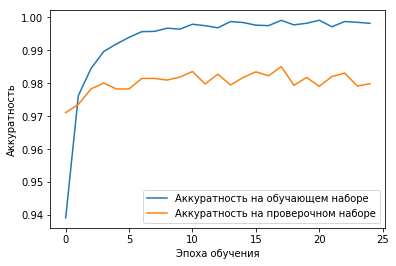

In [11]:
plt.plot(history.history['acc'], label='Аккуратность на обучающем наборе')
plt.plot(history.history['val_acc'], label='Аккуратность на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Аккуратность')
plt.legend()
plt.show()

In [12]:
x = X_test[488]
x = np.expand_dims(x, axis=0)
y = model.predict(x)
prediction = np.argmax(y)
print(prediction)

9


In [13]:
print(y_test[488])

9
